# Summary plots of hysteresis parameters

This notebook imports summary hysteresis parameters from a MagIC contribution and generates:
- a Day plot which is the remanence ratio (*M<sub>r</sub>/M<sub>s</sub>*; "squareness") vs. the coercivity ratio (*B<sub>cr</sub>/B<sub>c</sub>*)
- a squareness-coercivity diagram (*M<sub>r</sub>/M<sub>s</sub>*) vs. the coercivity (*B<sub>c</sub>*); also referred to as a Néel plot
  
Here, *M<sub>r</sub>* is the remanent magnetization, *M<sub>s</sub>* is the saturation magnetization, *B<sub>c</sub>* is the coercivity, and *B<sub>cr</sub>* is the coercivity of remanence.

In [1]:
import pmagpy.rockmag as rmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import local data in MagIC format
 
We will start by downloading the MagIC data associated with this paper (MagIC ID of 16460):
- Jackson, M. and Swanson-Hysell, N.L. (2012), Rock Magnetism of Remagnetized Carbonate Rocks: Another Look, In: Elmore, R. D., Muxworthy, A. R., Aldana, M. M. and Mena, M., eds., Remagnetization and Chemical Alteration of Sedimentary Rocks, Geological Society of London Special Publication, 371, https://doi.org/10.1144/SP371.3.

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = '../example_data/Jackson2012'

# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('16460', directory=dir_path)
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path, print_progress=False)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the measurements table
measurements = contribution.tables['measurements'].df
measurements = measurements.dropna(axis=1, how='all')
specimens = contribution.tables['specimens'].df

Download successful. File saved to: ../example_data/Jackson2012/magic_contribution_16460.txt
1  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/contribution.txt
5  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/locations.txt
8  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/sites.txt
51  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/samples.txt
186  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/specimens.txt
4758  records written to file  /Users/unimos/0000_Github/RockmagPy-notebooks/example_data/Jackson2012/measurements.txt
-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


In [3]:
specimens.head()

,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,hyst_xhf,instrument_codes,meas_orient_phi,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
specimen name,,,,,,,,,,,,,,,,,,,,,
09-27,This study,None,IRM-VSM1-4231,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,0.0,...,0.0448,0.0,0.003193,0.0,0.1,g,09-27,09-27,0.000004,0.00738
09-27,This study,None,IRM-VSM1-4231,0.01059,0.000015,0.003193,0.01086,6.732000e-08,IRM-VSM1,0.0,...,NaN,NaN,NaN,NaN,NaN,g,09-27,09-27,0.000004,0.00738
10-23,This study,None,IRM-VSM1-4232,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,0.0,...,0.0399,0.0,0.004520,0.0,0.1,g,10-23,10-23,0.000004,0.00785
10-23,This study,None,IRM-VSM1-4232,0.00455,0.000046,0.004520,0.02597,-1.511000e-08,IRM-VSM1,0.0,...,NaN,NaN,NaN,NaN,NaN,g,10-23,10-23,0.000004,0.00785
11-29,This study,None,None,NaN,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,None,11-29,11-29,0.000005,0.00901


## Make Day Plot

### Option 1: filter for individual specimen data and make a Day Plot

- One has more flexibility to make a custom plot 
- However, the user has to specify the row numbers that contain each of the attributes

In [4]:
specimen_name = '09-27'
example_specimen_data = specimens[specimens['specimen'] == specimen_name].reset_index()
example_specimen_data

,specimen name,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,hyst_xhf,instrument_codes,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
0,09-27,This study,None,IRM-VSM1-4231,NaN,NaN,NaN,NaN,NaN,IRM-VSM1,...,0.0448,0.0,0.003193,0.0,0.1,g,09-27,09-27,0.000004,0.00738
1,09-27,This study,None,IRM-VSM1-4231,0.01059,0.000015,0.003193,0.01086,6.732000e-08,IRM-VSM1,...,NaN,NaN,NaN,NaN,NaN,g,09-27,09-27,0.000004,0.00738


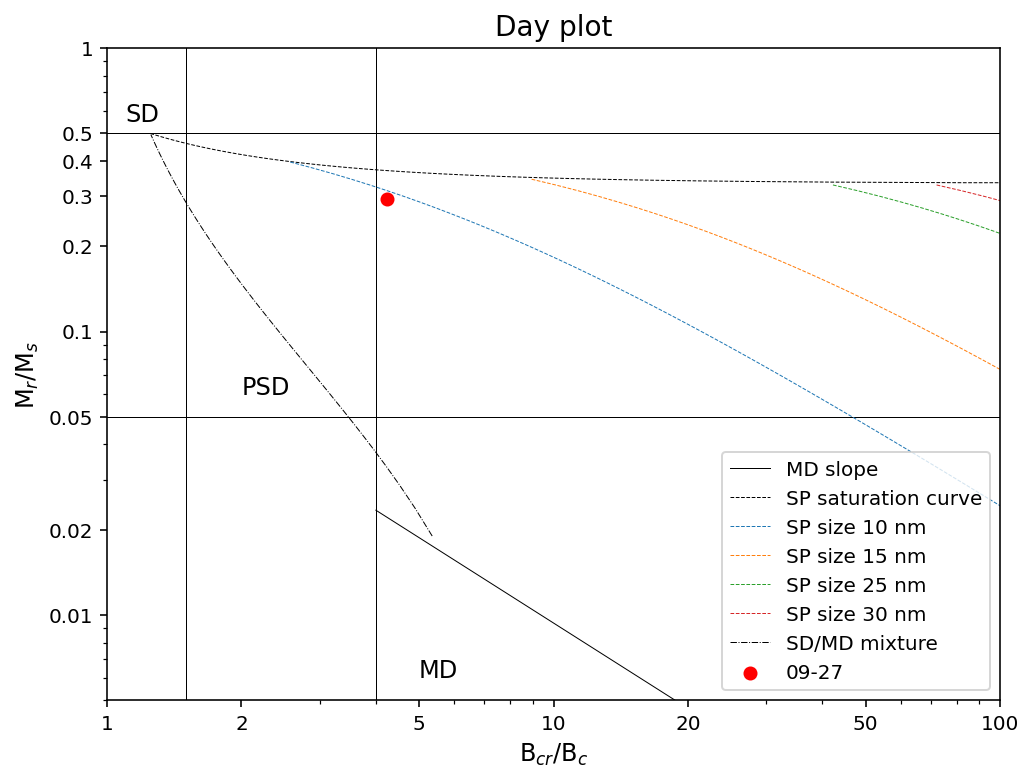

In [5]:
ax = rmag.day_plot(Mr = example_specimen_data['hyst_mr_mass'][1], 
                   Ms = example_specimen_data['hyst_ms_mass'][1],
                   Bcr = example_specimen_data['rem_bcr'][0],
                   Bc = example_specimen_data['hyst_bc'][1], 
                   color = 'red', 
                   marker = 'o', 
                   label = specimen_name, 
                   alpha=1, 
                   lc = 'black')

plt.show()

### Option 2: Plot all specimen data in a MagIC specimens data table on a Day Plot
- Because Bcr is obtained from a backfield experiment whereas other values can be obtained from a hysteresis experiment, the data entry in the data tables are decoupled. In many cases there could be multiple entries for the same attribute for the same specimen.
- If one were to use the default approach to plot all data at once, bear in mind that the default function will simply take the average of all of the entries for the same attribute for the same specimen.

In [6]:
H_specimens = specimens[specimens['specimen'].str.contains('H')].reset_index()

# let's filter for the room temperature measurements
H_specimens = H_specimens[H_specimens['meas_temp'] == 300].reset_index()
H_specimens_RT = H_specimens[H_specimens['meas_temp'] == 300].reset_index()
H_specimens_RT.head()

,level_0,index,specimen name,citations,description,experiments,hyst_bc,hyst_bc_offset,hyst_mr_mass,hyst_ms_mass,...,rem_bcr,rem_hirm_mass,rem_mr_mass,rem_sratio,rem_sratio_back,result_quality,sample,specimen,volume,weight
0,0,2,H1-0.2C,This study,None,IRM-VSM3-66769,0.004854,-0.003742,0.000034,0.000189,...,NaN,NaN,NaN,NaN,NaN,g,H1-0.2,H1-0.2C,1.300000e-06,0.004169
1,1,6,H1-0.4D,This study,None,IRM-VSM3-66771,NaN,NaN,NaN,NaN,...,0.0320,0.000003,0.000052,0.764,0.1,g,H1-0.4,H1-0.4D,9.000000e-07,0.004291
2,2,7,H1-0.4D,This study,average of 10 runs,IRM-VSM3-66770,0.005400,-0.001158,0.000052,0.000298,...,NaN,NaN,NaN,NaN,NaN,g,H1-0.4,H1-0.4D,9.000000e-07,0.004291
3,3,9,H1-0.5B,This study,None,IRM-VSM3-66773,NaN,NaN,NaN,NaN,...,0.0368,0.000001,0.000061,0.673,0.1,g,H1-0.5,H1-0.5B,2.700000e-06,0.010243
4,4,10,H1-0.5B,This study,None,IRM-VSM3-66772,0.006065,0.000918,0.000065,0.000316,...,NaN,NaN,NaN,NaN,NaN,g,H1-0.5,H1-0.5B,2.700000e-06,0.010243


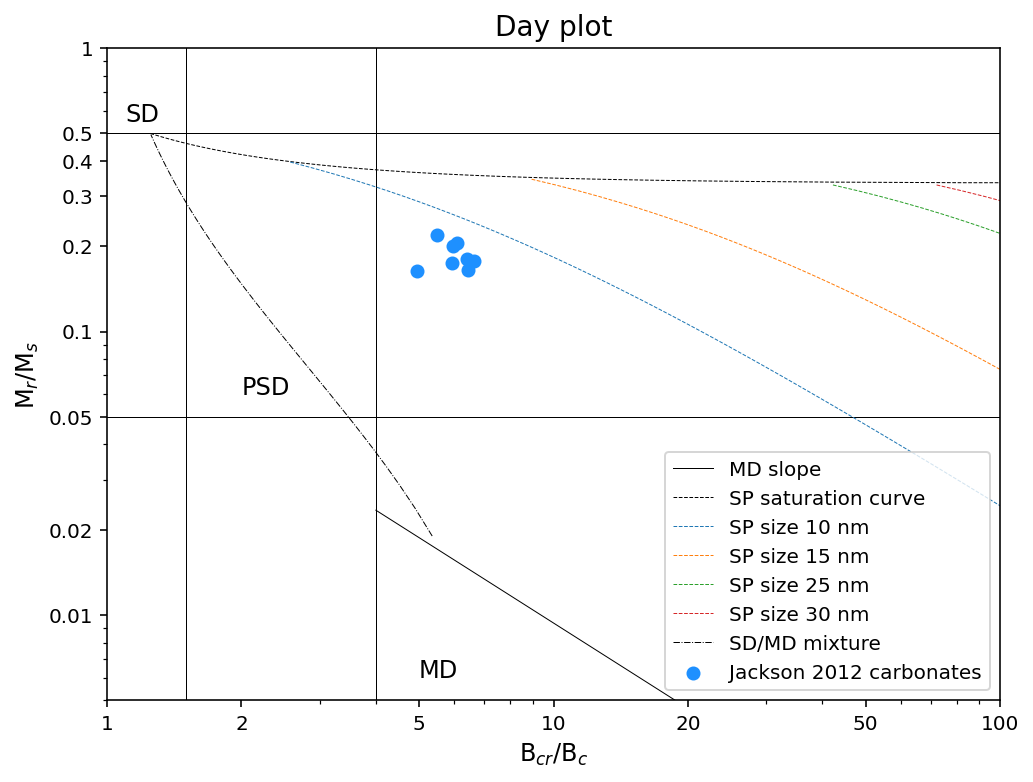

In [7]:
ax=rmag.day_plot_MagIC(H_specimens_RT,
               by='specimen',
               Mr='hyst_mr_mass', 
               Ms='hyst_ms_mass', 
               Bcr='rem_bcr', 
               Bc='hyst_bc', 
               color = 'dodgerblue', 
               marker = 'o', 
               label = 'Jackson 2012 carbonates', 
               alpha=1, 
               lc = 'black')

## Make squareness-coercivity diagram

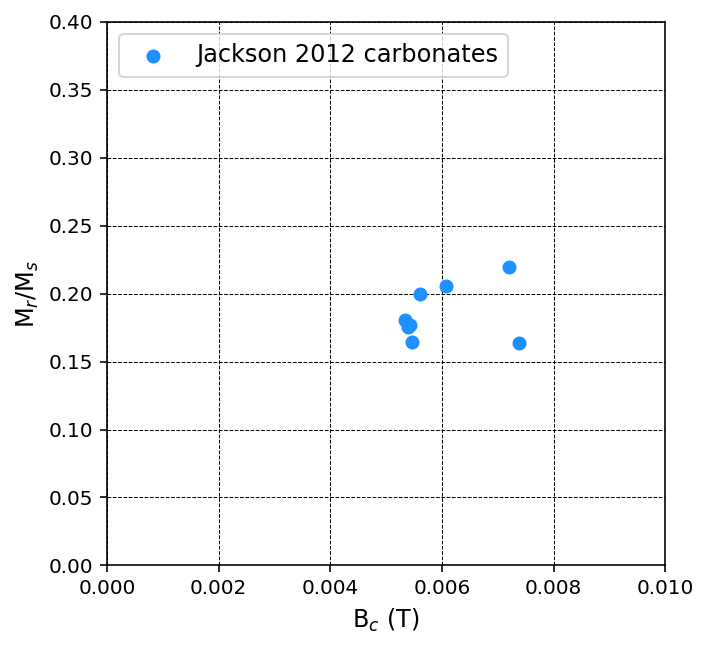

In [9]:

ax = rmag.neel_plot_magic(H_specimens_RT,
            by='specimen',
            Mr='hyst_mr_mass', 
            Ms='hyst_ms_mass', 
            Bcr='rem_bcr', 
            Bc='hyst_bc', 
            color = 'dodgerblue', 
            marker = 'o', 
            label = 'Jackson 2012 carbonates', 
            alpha=1, 
            lc = 'black')
ax.set_xlim(0, 0.01)
ax.set_ylim(0, 0.4)
plt.show()